# K-Nearest Neighbours, Naive Bayes and Decision Trees & the Iris dataset

In [2]:
# Import all useful libraries

import numpy as np 
import pandas as pd 
from sklearn import datasets 
import scipy.stats as stats # to make statistics
import matplotlib.pyplot as plt # to make plots 
from sklearn.preprocessing import StandardScaler # to scale the data
from sklearn.neighbors import KNeighborsClassifier # K-nearest neighbours classifier
from sklearn.model_selection import GridSearchCV # model optimizer 
from sklearn.metrics import confusion_matrix, f1_score # metrics to evaluate the performance
from sklearn.model_selection import train_test_split # to split between training and test datasets


In [3]:
iris_dt = datasets.load_iris() # load the data as a numpy array 

In [4]:
features = iris_dt["data"] # 1st_col=sepal length, 2nd_col=sepal width, 
# 3rd_col = petal length, 4th_col = petal width
targets = iris_dt["target"] # 0 -> setosa, 1 -> versicolor, 2 -> virginica

In [5]:
# convert the numpy array into a pandas dataframe to manipulate the features more easily

features = pd.DataFrame(features)
targets = pd.DataFrame(targets)
iris_dtset = pd.concat([features, targets], axis = 1)
iris_dtset.columns = ["sepal length [cm]", "sepal width [cm]", "petal length [cm]", "petal width [cm]", "species"]

In [6]:
iris_dtset.head() # look up the first five rows of the dataset 

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print("# of data: ", targets.size) # how many data? 

# of data:  150


In [8]:
# proportions of the classes

setosa = iris_dtset["species"].loc[iris_dtset["species"] == 0]
versicolor = iris_dtset["species"].loc[iris_dtset["species"] == 1]
virginica = iris_dtset["species"].loc[iris_dtset["species"] == 2]


print("Setosa species proportion: {} %".format(100*round(setosa.size/targets.size,2)))
print("Versicolor species proportion: {} %".format(100*round(versicolor.size/targets.size,2)))
print("Virginica species proportion: {} %".format(100*round(virginica.size/targets.size,2)))

Setosa species proportion: 33.0 %
Versicolor species proportion: 33.0 %
Virginica species proportion: 33.0 %


The classes are perfectly balanced.

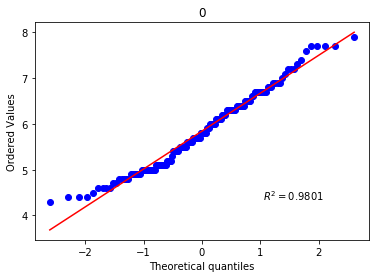

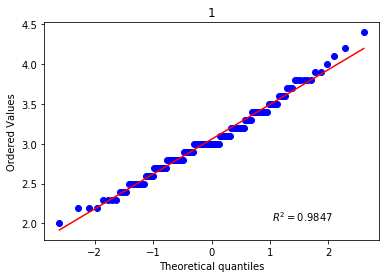

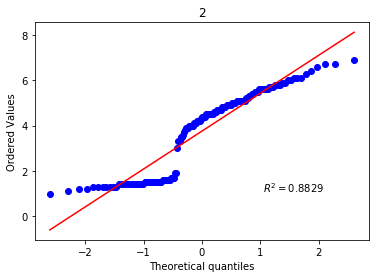

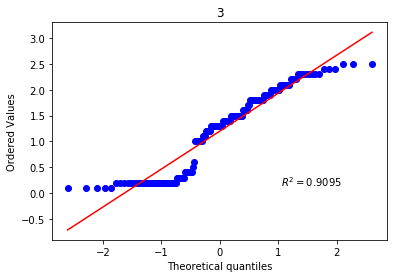

In [9]:
# Check whether there is normally distributed data

for i in range(4):
    stats.probplot(features[features.columns[i]], dist="norm", plot=plt, rvalue=True)
    plt.title(features.columns[i])
    plt.show()

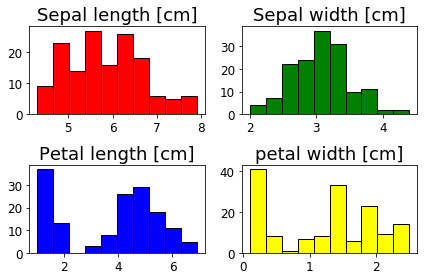

In [10]:
# Check the distribution of each feature

plt.subplot(221)
plt.hist(iris_dtset["sepal length [cm]"], color="red", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Sepal length [cm]", fontsize = 18)

plt.subplot(222)
plt.hist(iris_dtset["sepal width [cm]"], color="green", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Sepal width [cm]", fontsize = 18)

plt.subplot(223)
plt.hist(iris_dtset["petal length [cm]"], color="blue", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Petal length [cm]", fontsize = 18)

plt.subplot(224)
plt.hist(iris_dtset["petal width [cm]"], color="yellow", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("petal width [cm]", fontsize = 18)


plt.tight_layout()
plt.show()

In [11]:
# Standardize the features 

feat_scale = StandardScaler().fit_transform(features)

In [12]:
# Define and look for the best k-nearest neighbours classifier 

nns = KNeighborsClassifier()

def knn_param_selection(X, y, nfolds):
    n_nns = [5, 10, 15, 17, 20, 25, 30, 50, 100]
    param_grid = {"n_neighbors": n_nns}
    grid_search = GridSearchCV(nns, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    pred_targets = grid_search.predict(X)
    return (grid_search.best_params_, round(grid_search.best_score_,2), confusion_matrix(y, pred_targets),
           f1_score(y, pred_targets, average = "micro"))

In [13]:
# Apply the K-Nearest Neighbours classifier to the whole dataset

print("Parameters of the best model: {}".format(knn_param_selection(feat_scale, np.ravel(targets.values), 10)[0]))
print("Mean accuracy of the best model: {} %".format(knn_param_selection(feat_scale, np.ravel(targets.values), 10)[1]*100))
print("Confusion matrix: {}".format(knn_param_selection(feat_scale, np.ravel(targets.values), 10)[2]))
print("F-measure: {}".format(knn_param_selection(feat_scale, np.ravel(targets.values), 10)[3]))

Parameters of the best model: {'n_neighbors': 10}
Mean accuracy of the best model: 96.0 %
Confusion matrix: [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
F-measure: 0.96


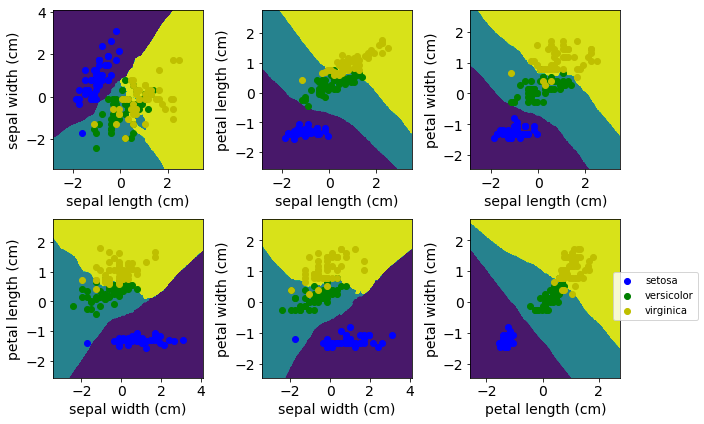

In [14]:
# Parameters
n_classes = 3
plot_colors = "bgy"
plot_step = 0.02

fig = plt.figure(figsize = (10,6))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris_dt.data[:, pair]
    y = iris_dt.target

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = KNeighborsClassifier(n_neighbors = 20).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z)

    plt.xlabel(iris_dt.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(iris_dt.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_dt.target_names[i]
                   )

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.95, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()

In [15]:
# Split the full dataset into training and test set

x_train, x_test, y_train, y_test = train_test_split(feat_scale, np.ravel(targets.values), test_size = 0.2)

In [18]:
# try out the naive Bayes classifier

from sklearn.naive_bayes import GaussianNB
    
bayes_class = GaussianNB()
bayes_class.fit(x_train, y_train)
np.random.seed(0)
print("Accuracy on the test set: {} %".format(round(100*bayes_class.score(x_test, y_test),2)))

Accuracy on the test set: 90.0 %


In [19]:
bayes_class.fit(feat_scale, np.ravel(targets))
print("Accuracy on the full dataset: {} %".format(round(100*bayes_class.score(feat_scale, np.ravel(targets)),2)))

Accuracy on the full dataset: 96.0 %


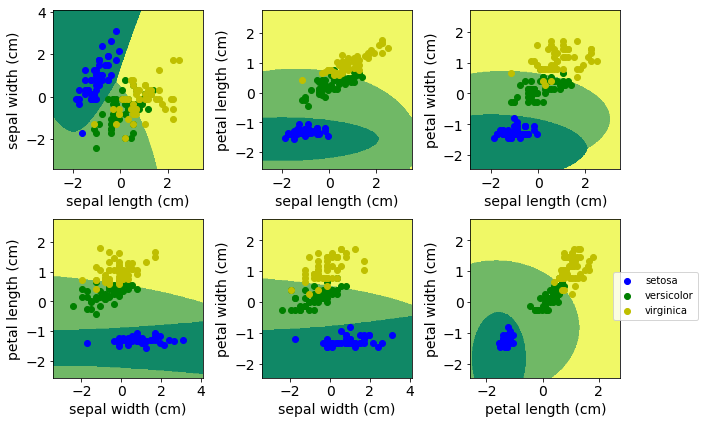

In [20]:
# Parameters
n_classes = 3
plot_colors = "bgy"
plot_step = 0.02

fig = plt.figure(figsize = (10,6))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = iris_dt.data[:, pair]
    y = iris_dt.target

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = GaussianNB().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.summer)

    plt.xlabel(iris_dt.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(iris_dt.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_dt.target_names[i],
                   cmap=plt.cm.summer)

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.95, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()

In [21]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "entropy", max_features = 3)

In [22]:
np.random.seed(0)
dtree.fit(x_train, y_train)
print("Accuracy on the test set: {} %".format(round(100*dtree.score(x_test, y_test),2)))

Accuracy on the test set: 90.0 %


In [23]:
dtree_2 = DecisionTreeClassifier(criterion = "entropy", max_features = 2)
dtree_2.fit(feat_scale, np.ravel(targets))
print("Accuracy on the full dataset: {} %".format(round(100*dtree_2.score(feat_scale, np.ravel(targets)),2)))

Accuracy on the full dataset: 100.0 %


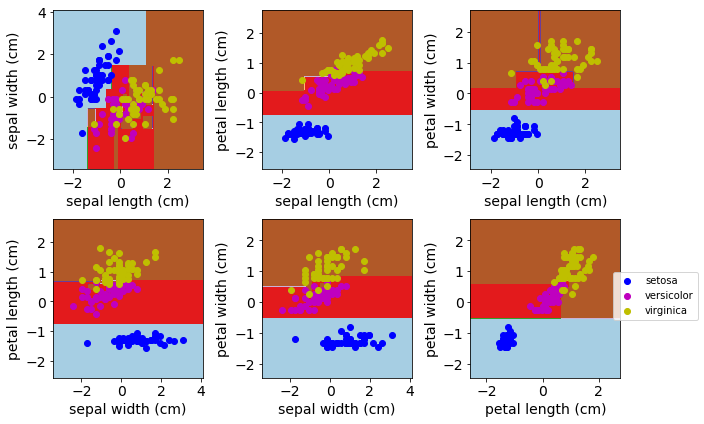

In [25]:
# Parameters
n_classes = 3
plot_colors = "bmy"
plot_step = 0.02

fig = plt.figure(figsize = (10,6))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris_dt.data[:, pair]
    y = iris_dt.target


    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier(criterion = "entropy", max_features = 2).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris_dt.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(iris_dt.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_dt.target_names[i],
                   cmap=plt.cm.Paired)

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.95, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()